In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pickle.load(open('test.pkl', 'rb'))

In [32]:
targets = []
inputs = []
for i in range(len(data)):
    bit, trace = data[i]
    if len(trace) >= 30:
        targets.append(bit)
        inputs.append(list(trace[:30]))
    elif len(trace) > 15 and i < len(data) and len(data[i+1][1]) + len(trace) >= 30:
        targets.append(bit)
        inputs.append(list(trace) + list(data[i+1][1][:30-len(trace)]))
    

In [47]:
target_arr = np.array(targets)
input_arr = np.array(inputs)

In [ ]:
def moving_avg(arr):
    

C:\Users\hwnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


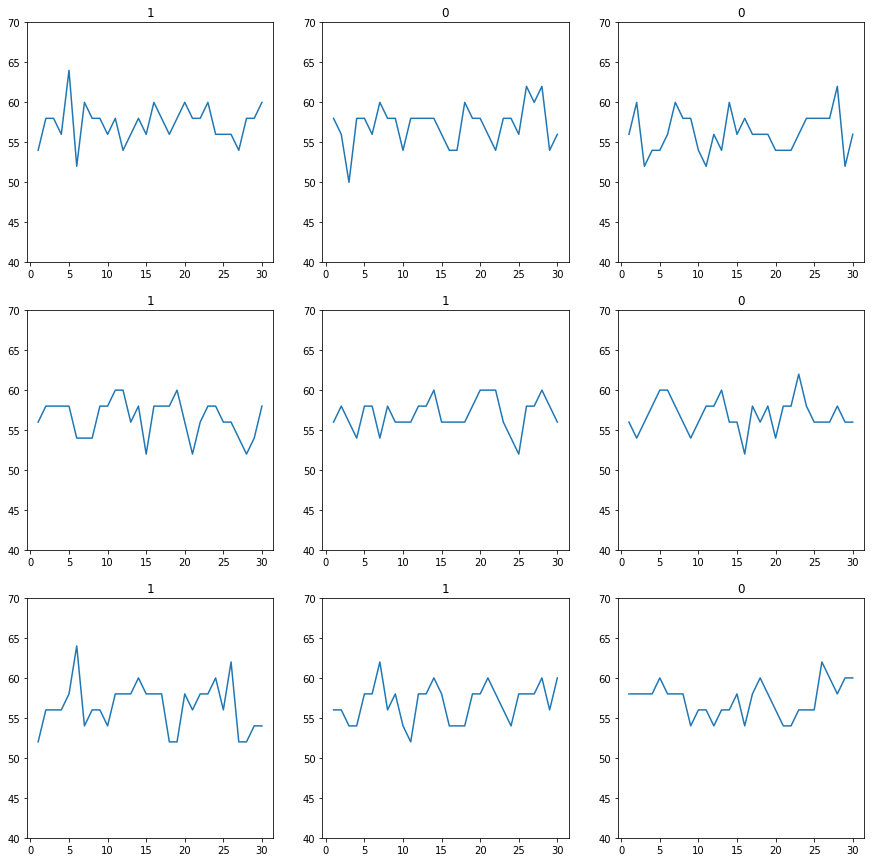

In [49]:

fig = plt.figure(figsize=(15,15))
for idx in range(1,10):
    rn = np.random.randint(len(targets))
    ax1 = fig.add_subplot(3,3,idx)
    ax1.set_title(str(targets[rn]))
    xaxis = np.arange(1,31)
    yaxis = input_arr[rn]
    ax1.plot(xaxis,yaxis)
    axes = plt.gca()
    axes.set_ylim([40,70])
fig.show()

In [34]:
input_arr[:10]

array([[62, 54, 58, 54, 52, 56, 58, 60, 64, 52, 52, 54, 58, 58, 60, 56,
        58, 56, 56, 56, 58, 56, 56, 58, 58, 64, 56, 58, 56, 58],
       [58, 56, 56, 58, 58, 64, 56, 58, 56, 58, 58, 58, 58, 58, 58, 54,
        56, 56, 56, 54, 56, 58, 54, 60, 58, 58, 62, 60, 54, 54],
       [56, 58, 56, 56, 58, 58, 60, 58, 58, 58, 56, 56, 58, 58, 58, 58,
        54, 60, 58, 58, 60, 62, 58, 58, 54, 56, 58, 58, 58, 58],
       [54, 54, 62, 58, 58, 58, 62, 56, 58, 56, 58, 58, 54, 56, 58, 58,
        54, 56, 58, 58, 62, 60, 58, 56, 58, 58, 56, 54, 58, 56],
       [54, 58, 52, 56, 62, 54, 56, 54, 56, 60, 56, 52, 56, 58, 58, 56,
        56, 54, 54, 54, 58, 60, 60, 58, 56, 52, 56, 58, 54, 60],
       [56, 54, 52, 58, 58, 60, 60, 56, 54, 54, 54, 56, 58, 56, 52, 56,
        52, 64, 58, 54, 56, 52, 56, 58, 58, 58, 58, 56, 54, 58],
       [64, 58, 54, 56, 52, 56, 58, 58, 58, 58, 56, 54, 58, 58, 60, 60,
        58, 56, 62, 54, 56, 56, 56, 56, 58, 58, 60, 56, 56, 54],
       [62, 54, 56, 56, 56, 56, 58, 58, 6

In [31]:
b, t = data[10]
print(b)

0
